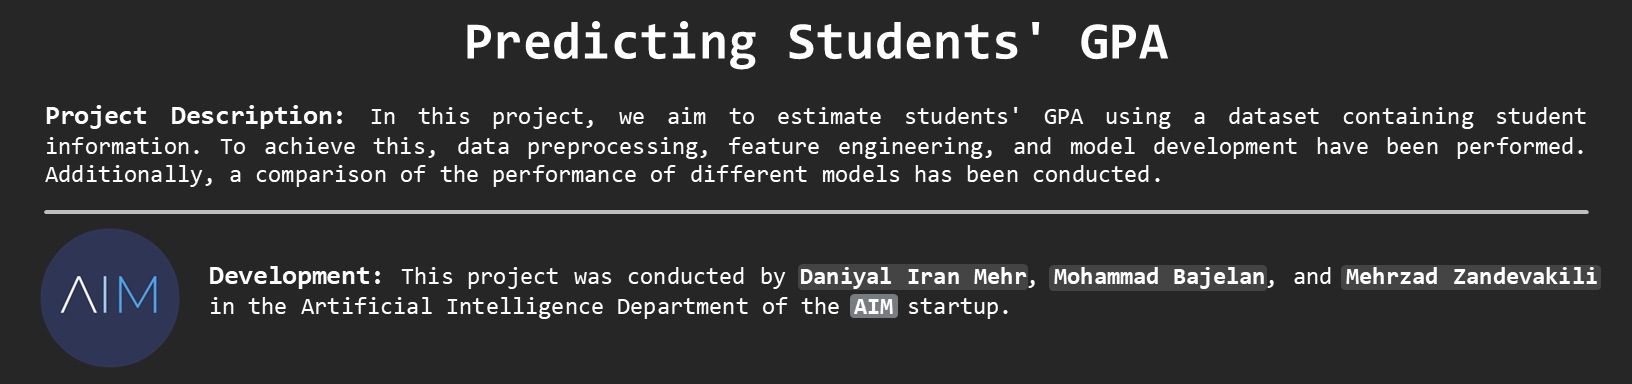

<h2 dir=ltr align=left style="line-height:200%;font-family:Consolas;color:#0099cc">
<font face="Consolas" color="#B8BCD6">
Dataset Information
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:Consolas; font-size:medium">
<font face="Consolas" size=3>
    In the <code>data</code> folder, there are two files named <code>train.csv</code> and <code>test.csv</code>, which represent the training and test datasets, respectively.
    The training dataset consists of 1,912 rows and 14 columns.
    The test dataset contains 479 rows and includes all columns except <code>GPA</code>.

</font>
</p>

<center>
<div dir=ltr style="direction: ltr;line-height:200%;font-family:Consolas;font-size:medium">
<font face="Consolas" size=3>

| <b>Feature Name</b> | <b>Description</b> |
| :---: | :---: |
| <code>StudentID</code> | Student_ID|
| <code>Age</code> | Age|
| <code>Gender</code> |Gender (0 for male, 1 for female)|
| <code>Ethnicity</code> |Student's ethnicity|
| <code>ParentalEducation</code> | Parents' education level|
| <code>StudyTimeWeekly</code> | Weekly study hours (range: 0 to 20 hours)|
| <code>Absences</code> | Number of absences in an academic year (range: 0 to 30)|
| <code>Tutoring</code> | Private tutoring status (0 for no, 1 for yes)|
| <code>ParentalSupport</code> | Level of parental support|
| <code>Extracurricular</code> | Participation in extracurricular programs (0 for no, 1 for yes)|
| <code>Sports</code> | Participation in sports programs (0 for no, 1 for yes)||
| <code>Music</code> | Participation in music programs (0 for no, 1 for yes)||
| <code>Volunteering</code> | Participation in volunteer programs (0 for no, 1 for yes)||
| <code>GPA</code> | Grade Point Average (GPA) in the range of 0 to 4|

</font>


### Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [4]:
dfTest = pd.read_csv(r"C:/Users/LenOvO/AIM/Quera/avg/data/train.csv", index_col = 0)
dfTrain = pd.read_csv(r"C:/Users/LenOvO/AIM/Quera/avg/data/train.csv")

### Data processing

In [9]:
X_train = dfTrain.iloc[:, :-1]  # Features
y_train = dfTrain.iloc[:, -1]  # GPA

X_train = X_train.drop(columns=["ParentalSupport","ParentalEducation"])
X_train = X_train.drop(columns=["StudentID"])

Ethnicity_dic = {"Caucasian" : 1,
                 "Other" : 2,
                 "Asian" : 3,
                 "African American" : 4}
X_train["Ethnicity"] = X_train["Ethnicity"].map(Ethnicity_dic)
X_train

,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering
0,18,1,1,18.118879,24,1,1,1,0,0
1,16,1,2,2.469271,19,0,0,0,0,1
2,17,0,3,3.456401,25,0,0,0,0,0
3,17,1,1,15.838131,25,1,0,0,0,0
4,16,0,1,1.045373,19,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1908,15,0,4,13.092424,13,1,0,0,0,0
1909,16,0,1,2.159249,19,0,0,1,0,0
1910,16,1,1,3.572578,14,1,1,1,0,0
1911,18,0,2,4.402585,20,0,0,0,0,0


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Definition of the 0 to 1 scale
X_train["StudyTimeWeekly"] = scaler.fit_transform(X_train[["StudyTimeWeekly"]])
X_train

,Age,Gender,Ethnicity,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering
0,18,1,1,0.907339,24,1,1,1,0,0
1,16,1,2,0.123306,19,0,0,0,0,1
2,17,0,3,0.172761,25,0,0,0,0,0
3,17,1,1,0.793076,25,1,0,0,0,0
4,16,0,1,0.051970,19,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1908,15,0,4,0.655518,13,1,0,0,0,0
1909,16,0,1,0.107774,19,0,0,1,0,0
1910,16,1,1,0.178581,14,1,1,1,0,0
1911,18,0,2,0.220164,20,0,0,0,0,0


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=42)